In [ ]:
!pip install dataprep

In [ ]:
import pandas as pd
import numpy as np
from dataprep.eda import plot, plot_correlation, create_report, plot_missing

In [ ]:
#Loading Test and Train datasets
X_Train = pd.read_csv("/content/X_Train_Data_Input.csv")
Y_Train = pd.read_csv("/content/Y_Train_Data_Target.csv")
X_Test = pd.read_csv("/content/X_Test_Data_Input.csv")
Y_Test = pd.read_csv("/content/Y_Test_Data_Target.csv")


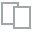
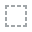
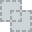
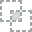
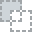
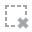
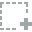
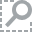
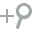
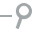
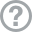
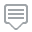
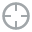
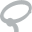
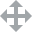
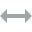
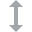
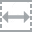
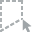
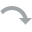
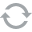
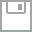
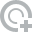
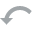
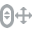
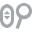
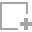
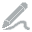
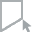
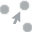
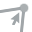
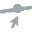

In [ ]:
#Plotting the datasets to check on stats and Insights
plot(X_Test)

In [ ]:
#Merging Targets and data for both test and train sets
train_data = pd.merge(X_Train,Y_Train,on='ID')
test_data = pd.merge(X_Test,Y_Test,on='ID')

In [ ]:
print(train_data.shape)
print(test_data.shape)

(785133, 24)
(261712, 24)


Train dataset contains 785133 rows and 24 columns
Test dataset contains 261712 rows and 24 columns

In [ ]:
#Removing ID column from both datasets. As unique column has overfitting risk
train_data.drop('ID', axis=1, inplace=True)
test_data.drop('ID', axis=1, inplace=True)

In [ ]:
#Checking Train_Data
train_data.describe()

Column0        Column1        Column2        Column3  \
count  785124.000000  785133.000000  785133.000000  658830.000000   
mean        0.440757    1321.788614    2951.279411      -0.000210   
std         1.163275     907.267965    2143.140140       0.999935   
min         0.000000   -1080.000000     -47.000000      -2.028572   
25%         0.000000     515.000000    1129.000000      -0.675216   
50%         0.000000    1173.000000    2709.000000       0.678139   
75%         0.000000    2435.000000    4472.000000       0.678139   
max        18.000000    2499.000000   10290.000000       0.678139   

             Column4        Column5        Column6        Column7  \
count  657423.000000  617953.000000  781283.000000  785133.000000   
mean       -0.000855      -0.000367      -0.000709       0.000727   
std         1.000350       1.015255       0.998984       1.045883   
min        -1.855728      -0.007469      -0.407939      -0.015607   
25%        -0.577162      -0.007469      -0.407939      -0.015607   
50%         0.701403      -0.007469      -0.407939      -0.015607   
75%         0.701403      -0.007468      -0.367723      -0.015607   
max         0.701403     551.421127      14.985817     201.687947   

             Column8       Column9  ...       Column13       Column14  \
count  781283.000000  52996.000000  ...  785133.000000  419430.000000   
mean       -0.000158      0.005245  ...       0.328285      -0.000863   
std         1.056769      1.111058  ...       0.469589       1.291202   
min        -0.774979     -0.088554  ...       0.000000    -832.749615   
25%        -0.774979     -0.086503  ...       0.000000       0.001351   
50%         0.122085     -0.081820  ...       0.000000       0.001351   
75%         0.625528     -0.063140  ...       1.000000       0.001351   
max       323.992484    133.911803  ...       1.000000       8.514416   

            Column15       Column16       Column17       Column18  \
count  768677.000000  785133.000000  785133.000000  785133.000000   
mean       -0.000837       0.001206       0.270092       0.147856   
std         1.283393       0.034855       3.128214       0.430530   
min     -1091.545904       0.000000       0.000000       0.000000   
25%         0.003390       0.000000       0.000000       0.000000   
50%         0.003390       0.000000       0.000000       0.000000   
75%         0.003390       0.000000       0.000000       0.000000   
max         0.012736       2.000000     728.000000      12.000000   

            Column19       Column20       Column21         target  
count  785133.000000  785133.000000  785133.000000  785133.000000  
mean        0.018759       0.009351       0.002757       0.094294  
std         0.135671       0.096249       0.052439       0.292237  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 23 columns]

In [ ]:
#Checking Test_Data
test_data.describe()

Column0        Column1        Column2        Column3  \
count  261710.000000  261712.000000  261712.000000  219478.000000   
mean        0.441684    1321.450530    2956.365153       0.001422   
std         1.168206     908.290073    2147.398218       0.999297   
min         0.000000    -933.000000     -57.000000      -2.028572   
25%         0.000000     513.000000    1131.000000      -0.675216   
50%         0.000000    1173.000000    2716.000000       0.678139   
75%         0.000000    2436.000000    4478.000000       0.678139   
max        18.000000    2501.000000    9977.000000       0.678139   

             Column4        Column5        Column6        Column7  \
count  219002.000000  206053.000000  260478.000000  261712.000000   
mean        0.002494       0.000998       0.003269      -0.000461   
std         0.998968       1.194067       1.003476       0.957254   
min        -1.855728      -0.007469      -0.407939      -0.015607   
25%        -0.577162      -0.007469      -0.407939      -0.015607   
50%         0.701403      -0.007469      -0.407939      -0.015607   
75%         0.701403      -0.007468      -0.363713      -0.015607   
max         0.701403     357.204763       3.440527     187.807115   

             Column8       Column9  ...       Column13       Column14  \
count  260478.000000  17859.000000  ...  261712.000000  140033.000000   
mean        0.000477     -0.008717  ...       0.327020       0.001313   
std         0.897452      0.807577  ...       0.469125       0.024071   
min        -0.774979     -0.088554  ...       0.000000      -6.330084   
25%        -0.774979     -0.086591  ...       0.000000       0.001351   
50%         0.127514     -0.081951  ...       0.000000       0.001351   
75%         0.627312     -0.063544  ...       1.000000       0.001351   
max       120.465103     51.780491  ...       1.000000       3.649944   

            Column15       Column16       Column17       Column18  \
count  256227.000000  261712.000000  261712.000000  261712.000000   
mean        0.001088       0.001169       0.273419       0.148262   
std         0.197184       0.034174       3.362045       0.432855   
min       -49.783222       0.000000       0.000000       0.000000   
25%         0.003390       0.000000       0.000000       0.000000   
50%         0.003390       0.000000       0.000000       0.000000   
75%         0.003390       0.000000       0.000000       0.000000   
max         0.003551       1.000000     556.000000      12.000000   

            Column19       Column20       Column21         target  
count  261712.000000  261712.000000  261712.000000  261712.000000  
mean        0.018574       0.009633       0.002709       0.094294  
std         0.135015       0.097673       0.051978       0.292239  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 23 columns]

In [ ]:
#Checking summary of Train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785133 entries, 0 to 785132
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Column0   785124 non-null  float64
 1   Column1   785133 non-null  int64  
 2   Column2   785133 non-null  float64
 3   Column3   658830 non-null  float64
 4   Column4   657423 non-null  float64
 5   Column5   617953 non-null  float64
 6   Column6   781283 non-null  float64
 7   Column7   785133 non-null  float64
 8   Column8   781283 non-null  float64
 9   Column9   52996 non-null   float64
 10  Column10  785133 non-null  int64  
 11  Column11  785133 non-null  int64  
 12  Column12  785133 non-null  int64  
 13  Column13  785133 non-null  int64  
 14  Column14  419430 non-null  float64
 15  Column15  768677 non-null  float64
 16  Column16  785133 non-null  float64
 17  Column17  785133 non-null  int64  
 18  Column18  785133 non-null  float64
 19  Column19  785133 non-null  int64  
 20  Colu

In [ ]:
#Checking summary of Test dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261712 entries, 0 to 261711
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Column0   261710 non-null  float64
 1   Column1   261712 non-null  int64  
 2   Column2   261712 non-null  float64
 3   Column3   219478 non-null  float64
 4   Column4   219002 non-null  float64
 5   Column5   206053 non-null  float64
 6   Column6   260478 non-null  float64
 7   Column7   261712 non-null  float64
 8   Column8   260478 non-null  float64
 9   Column9   17859 non-null   float64
 10  Column10  261712 non-null  int64  
 11  Column11  261712 non-null  int64  
 12  Column12  261712 non-null  int64  
 13  Column13  261712 non-null  int64  
 14  Column14  140033 non-null  float64
 15  Column15  256227 non-null  float64
 16  Column16  261712 non-null  float64
 17  Column17  261712 non-null  int64  
 18  Column18  261712 non-null  float64
 19  Column19  261712 non-null  int64  
 20  Colu

In [ ]:
#Checking the no. of null values in each and every column for both Test and Train Datasets
train_data.isnull().sum()
test_data.isnull().sum()

Column0          2
Column1          0
Column2          0
Column3      42234
Column4      42710
Column5      55659
Column6       1234
Column7          0
Column8       1234
Column9     243853
Column10         0
Column11         0
Column12         0
Column13         0
Column14    121679
Column15      5485
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
target           0
dtype: int64

In [ ]:
#Checking the percentage of missing values in both Train and Test Datasets
train_data_null_value_percentage = (train_data.isnull().sum() / len(X_Train))*100
test_data_null_value_percentage = (test_data.isnull().sum() / len(X_Test))*100
print(train_data_null_value_percentage)
print(test_data_null_value_percentage)

Column0      0.001146
Column1      0.000000
Column2      0.000000
Column3     16.086829
Column4     16.266034
Column5     21.293208
Column6      0.490363
Column7      0.000000
Column8      0.490363
Column9     93.250061
Column10     0.000000
Column11     0.000000
Column12     0.000000
Column13     0.000000
Column14    46.578478
Column15     2.095951
Column16     0.000000
Column17     0.000000
Column18     0.000000
Column19     0.000000
Column20     0.000000
Column21     0.000000
target       0.000000
dtype: float64
Column0      0.000764
Column1      0.000000
Column2      0.000000
Column3     16.137586
Column4     16.319466
Column5     21.267271
Column6      0.471511
Column7      0.000000
Column8      0.471511
Column9     93.176087
Column10     0.000000
Column11     0.000000
Column12     0.000000
Column13     0.000000
Column14    46.493474
Column15     2.095815
Column16     0.000000
Column17     0.000000
Column18     0.000000
Column19     0.000000
Column20     0.000000
Column21     0.00

In [ ]:
#Dropping column9 as it contains 93% of missing values
train_data.drop('Column9', axis=1, inplace=True)
test_data.drop('Column9', axis=1, inplace=True)

In [ ]:
train_data.shape

(785133, 22)

In [ ]:
#Using Median Imputation as the data is skewed

#We are not dropping any rows as we are not sure about the description of features
for column in ['Column3', 'Column4', 'Column5','Column6','Column8', 'Column14','Column15']:
    train_data[column].fillna(train_data[column].median(), inplace=True)

#Column0 contains only 9 missing values. So, using mode imputation
# Calculate the mode for Column0
mode_value_column0 = train_data['Column0'].mode()[0]  # Calculate the mode

# Replacing missing values in Column0 with the mode
train_data['Column0'].fillna(mode_value_column0, inplace=True)


for column in ['Column3', 'Column4', 'Column5','Column6','Column8', 'Column14','Column15']:
    test_data[column].fillna(test_data[column].median(), inplace=True)

#Column0 contains only 9 missing values. So, using mode imputation
# Calculate the mode for Column0
mode_value_column0 = test_data['Column0'].mode()[0]  # Calculate the mode

# Replacing missing values in Column0 with the mode
test_data['Column0'].fillna(mode_value_column0, inplace=True)


In [ ]:
#Checking for missing values in both Test and Train Datasets
train_data.isnull().sum()
test_data.isnull().sum()

Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column10    0
Column11    0
Column12    0
Column13    0
Column14    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
target      0
dtype: int64

All the null values are being handled

In [ ]:
#Train_Dataset.to_csv('Train_Dataset.csv', index=False)

In [ ]:
#Test_Dataset.to_csv('Test_Dataset.csv',index=False)

In [ ]:
train_data.shape

(785133, 22)

Null values are handled in the dataset

In [ ]:
#Class Balancing for Test Dataset
from imblearn.over_sampling import SMOTE

# Separate features (X) and target (y)
X_test = train_data.drop('target', axis=1)
y_test = train_data['target']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_test, y_test)

# Combine resampled data back into a DataFrame
train_data_with_class_balance = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['target'])], axis=1)

print(train_data_with_class_balance['target'].value_counts())  # To check if the classes are balanced


0    711100
1    711100
Name: target, dtype: int64


In [ ]:
#Class Balancing for Test Dataset
from imblearn.over_sampling import SMOTE

# Separate features (X) and target (y)
X_test = test_data.drop('target', axis=1)
y_test = test_data['target']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_test, y_test)

# Combine resampled data back into a DataFrame
test_data_with_class_balance = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['target'])], axis=1)

print(test_data_with_class_balance['target'].value_counts())  # To check if the classes are balanced


0    237034
1    237034
Name: target, dtype: int64


In [ ]:
# #Removing Outliers for train data

# import numpy as np
# import pandas as pd

# def remove_outliers_iqr(df):
#     Q1 = df.quantile(0.25)
#     Q3 = df.quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df_out = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
#     return df_out

# train_data_with_class_balance_outliers = remove_outliers_iqr(train_data_with_class_balance)

# #test_data = remove_outliers_iqr(test_data)


In [ ]:
# #Removing Outliers for test data

# import numpy as np
# import pandas as pd

# def remove_outliers_iqr(df):
#     Q1 = df.quantile(0.25)
#     Q3 = df.quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df_out = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
#     return df_out

# test_data_with_class_balance_outliers = remove_outliers_iqr(test_data_with_class_balance)

# #test_data = remove_outliers_iqr(test_data)


In [ ]:
print(train_data_with_class_balance.shape)
print(test_data_with_class_balance.shape)

(1422200, 22)
(474068, 22)


In [ ]:
# #Renaming the dataframes
# train_data = train_data_with_class_balance_outliers
# test_data = test_data_with_class_balance_outliers

# print(train_data.shape)
# print(test_data.shape)

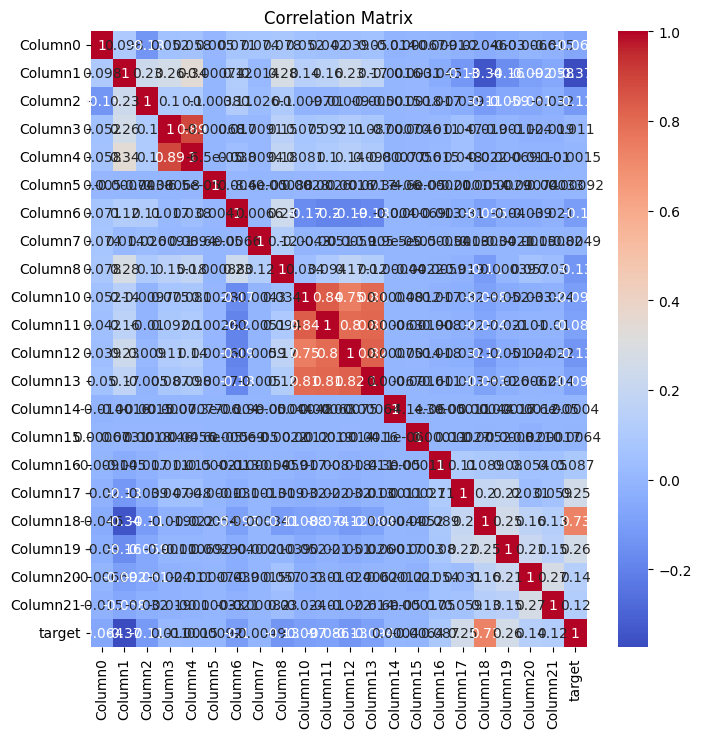

In [ ]:
#Corelation matrix for Train data
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = train_data.corr()

# Plot heatmap for better visualization
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


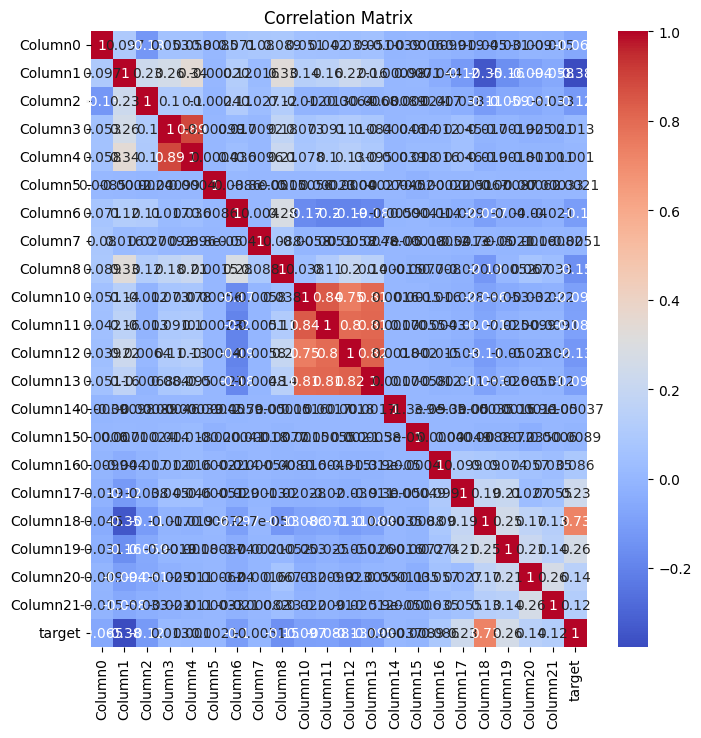

In [ ]:
#Corelation matrix for Test data
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = test_data.corr()

# Plot heatmap for better visualization
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Assuming 'train_data' and 'test_data' are your loaded dataframes

# 1. Compute the correlation matrix for train_data
corr_matrix = train_data.corr().abs()

# 2. Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 3. Find features with correlation greater than 0.85 (or any other threshold you prefer)
threshold = 0.85
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print(f"Features to remove due to high correlation: {to_drop}")

# 4. Drop these features from both train_data and test_data
X_train_cleaned = train_data.drop(columns=to_drop)
X_test_cleaned = test_data.drop(columns=to_drop)

# Split the cleaned train and test data into features and target
X_train = X_train_cleaned.iloc[:, :-1]  # All columns except the target
y_train = X_train_cleaned.iloc[:, -1]   # The target column
X_test = X_test_cleaned.iloc[:, :-1]    # All columns except the target
y_test = X_test_cleaned.iloc[:, -1]     # The target column


Features to remove due to high correlation: ['Column4']


In [ ]:
#dropping column 4 due to high correlation
train_data.drop('Column4', axis=1, inplace=True)
test_data.drop('Column4', axis=1, inplace=True)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(785133, 21)
(261712, 21)


In [ ]:
print(train_data.columns)

Index(['Column0', 'Column1', 'Column2', 'Column3', 'Column5', 'Column6',
       'Column7', 'Column8', 'Column10', 'Column11', 'Column12', 'Column13',
       'Column14', 'Column15', 'Column16', 'Column17', 'Column18', 'Column19',
       'Column20', 'Column21', 'target'],
      dtype='object')


In [ ]:
#Removing duplicate rows
# Remove duplicate rows from train_data
train_data = train_data.drop_duplicates()
test_data= test_data.drop_duplicates()


In [ ]:
print(train_data.shape,test_data.shape)

(767462, 21) (258625, 21)


In [ ]:
#Feature Scaling for Test_Dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import FunctionTransformer

def log_transform(data):
    transformer = FunctionTransformer(np.log1p, validate=True)
    return transformer.transform(data)

test_data['Column0'] = log_transform(test_data['Column0'].values.reshape(-1, 1))

# Min-Max Scaling for column0 #Heavily skewed data
min_max_scaler = MinMaxScaler()
test_data['Column0'] = min_max_scaler.fit_transform(test_data[['Column0']])

# Standard Scaling for column1, skewness and kurtosis are close to normal.
standard_scaler = StandardScaler()
test_data['Column1'] = standard_scaler.fit_transform(test_data[['Column1']])

# Robust Scaling for column2
robust_scaler = RobustScaler()
test_data['Column2'] = robust_scaler.fit_transform(test_data[['Column2']])

# Display the first few rows of the scaled data
print(test_data.head())


    Column0   Column1   Column2   Column3   Column5   Column6   Column7  \
0  0.235409  0.740446 -0.793670  0.678139 -0.007469 -0.407939 -0.015607   
1  0.373114  0.290307 -0.805912  0.678139 -0.007468 -0.407939 -0.015607   
2  0.000000 -0.462873  0.330248 -2.028572 -0.007469 -0.407939 -0.015607   
3  0.000000 -1.368681  0.220364 -0.675216 -0.007469  0.004020 -0.015607   
4  0.235409 -0.741583  1.134368 -2.028572 -0.007469 -0.407939 -0.015434   

    Column8  Column10  Column11  ...  Column13  Column14  Column15  Column16  \
0  0.554860         1         1  ...         1  0.001351   0.00339       0.0   
1  0.142149         0         1  ...         0  0.001351   0.00339       0.0   
2 -0.774979         0         0  ...         0  0.001351   0.00339       0.0   
3  0.635264         0         1  ...         1  0.001351   0.00339       0.0   
4 -0.774979         1         1  ...         1  0.001351   0.00339       0.0   

   Column17  Column18  Column19  Column20  Column21  target  
0     

<ipython-input-43-2d8383de26d2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Column0'] = log_transform(test_data['Column0'].values.reshape(-1, 1))
<ipython-input-43-2d8383de26d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Column0'] = min_max_scaler.fit_transform(test_data[['Column0']])


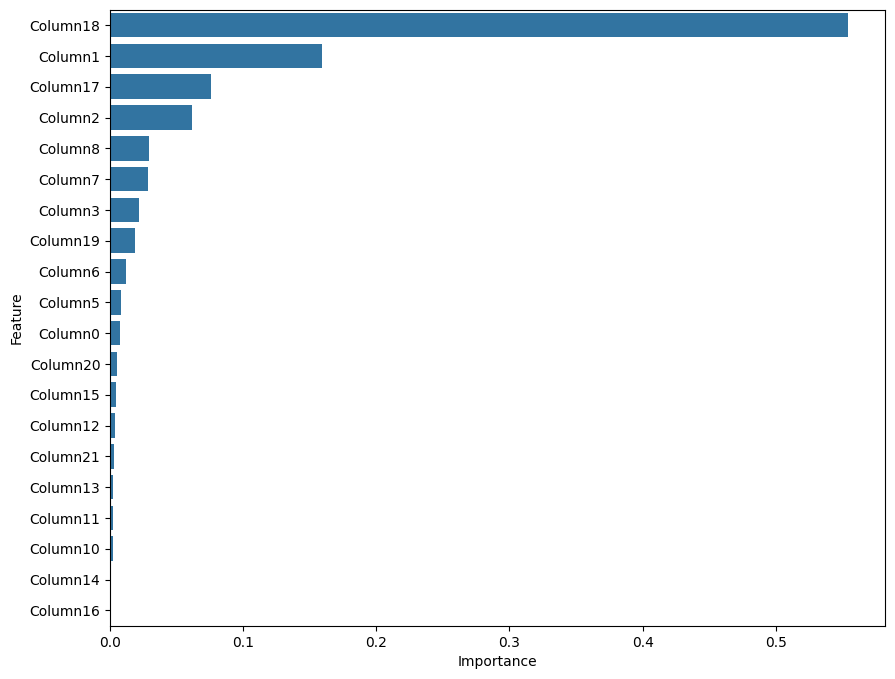

In [ ]:
#Feature Importance via RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Assume df_train has your features and 'target' is the target column
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']

X_test = test_data.drop('target', axis=1)
y_test = test_data['target']

# Train a random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to visualize
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.show()


Features to keep: ['Column18', 'Column1', 'Column17', 'Column2', 'Column8', 'Column7', 'Column3', 'Column19', 'Column6']
Accuracy: 0.96
Precision: 0.97
Recall: 0.96
F1 Score: 0.97
ROC-AUC Score: 0.98


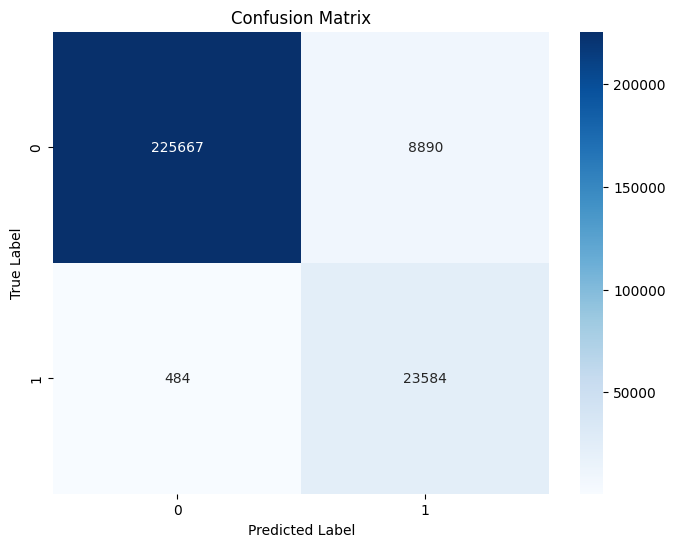

In [ ]:
# Step 1: Set a threshold for importance (you can adjust this based on the chart)
importance_threshold = 0.01  # Features with importance < 0.01 will be dropped

# Step 2: Filter the features based on the threshold
important_features = feature_importance_df[feature_importance_df['Importance'] > importance_threshold]['Feature']

print(f"Features to keep: {list(important_features)}")

# Step 3: Update train and test sets to include only important features
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# Step 4: Retrain the Random Forest with only important features
rf_important = RandomForestClassifier(random_state=42)
rf_important.fit(X_train_important, y_train)

# Step 5: Evaluate the model
y_pred_important = rf_important.predict(X_test_important)

# Import all necessary metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Step 6: Calculate and print all relevant evaluation metrics
accuracy = accuracy_score(y_test, y_pred_important)
precision = precision_score(y_test, y_pred_important, average='weighted')
recall = recall_score(y_test, y_pred_important, average='weighted')
f1 = f1_score(y_test, y_pred_important, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Step 7: (Optional) Compute ROC-AUC if it's a binary classification
if len(y_test.unique()) == 2:
    y_prob_important = rf_important.predict_proba(X_test_important)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob_important)
    print(f"ROC-AUC Score: {roc_auc:.2f}")

# Step 8: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_important)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    234557
           1       0.73      0.98      0.83     24068

    accuracy                           0.96    258625
   macro avg       0.86      0.97      0.91    258625
weighted avg       0.97      0.96      0.97    258625

ROC-AUC Score: 0.98


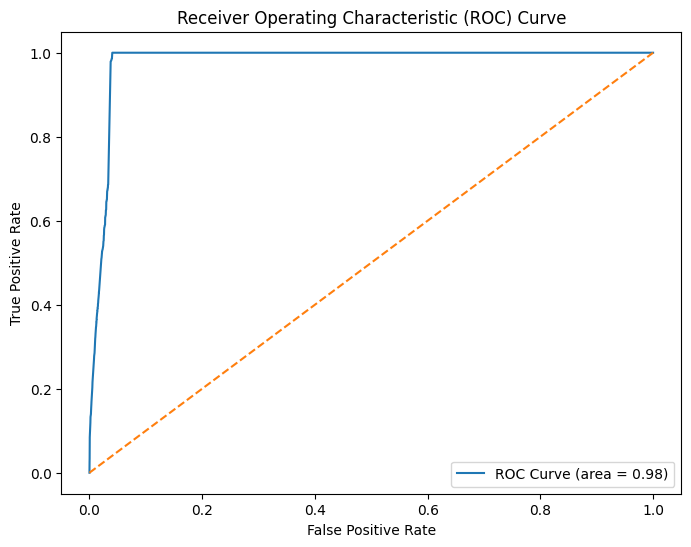

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculate precision, recall, F1-score, and support
print("Classification Report:")
print(classification_report(y_test, y_pred_important))

# ROC-AUC for binary classification
if len(y_test.unique()) == 2:
    y_prob_important = rf_important.predict_proba(X_test_important)[:, 1]  # Probability estimates for the positive class
    roc_auc = roc_auc_score(y_test, y_prob_important)
    print(f"ROC-AUC Score: {roc_auc:.2f}")

    # Plot the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob_important)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')  # Dashed diagonal line for random classifier
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the training data
cv_scores = cross_val_score(rf_important, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Cross-Validation Accuracy: 0.98 ± 0.00


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_important))  # Replace y_pred with predictions from rf_important


              precision    recall  f1-score   support

           0       1.00      0.96      0.98    234557
           1       0.73      0.98      0.83     24068

    accuracy                           0.96    258625
   macro avg       0.86      0.97      0.91    258625
weighted avg       0.97      0.96      0.97    258625



In [ ]:
rf_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_weighted.fit(X_train, y_train)
y_pred_weighted = rf_weighted.predict(X_test)

# Evaluate the weighted model
print(classification_report(y_test, y_pred_weighted))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97    234557
           1       0.74      0.64      0.68     24068

    accuracy                           0.95    258625
   macro avg       0.85      0.81      0.83    258625
weighted avg       0.94      0.95      0.94    258625



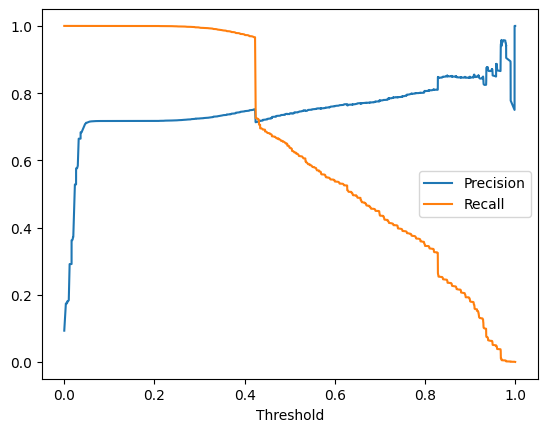

In [ ]:
from sklearn.metrics import precision_recall_curve
y_prob_weighted = rf_weighted.predict_proba(X_test)[:, 1]

# Get precision, recall values for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_weighted)

# Plot precision and recall as a function of threshold
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid to tune
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Use GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
